In [1]:
# Importing the libraries

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# For reading stock data from yahoo
from pandas_datareader import data

# For time stamps
from datetime import datetime

# For division
from __future__ import division

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL','GOOG','MSFT','AMZN']

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

for stock in tech_list:   
    # Set DataFrame as the Stock Ticker
    globals()[stock] = data.DataReader(stock, 'yahoo', start, end)

In [3]:
# Summary Stats
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,102.337887,99.358879,100.856726,100.906865,1.548717e+08,100.522229
std,24.013910,23.529777,23.958482,23.762408,7.115646e+07,23.868382
min,57.125000,53.152500,57.020000,56.092499,4.669130e+07,55.661041
25%,79.911875,78.415001,79.011877,79.205002,1.041511e+08,78.808517
50%,110.834999,107.494999,109.121250,108.898750,1.372656e+08,108.465508
75%,121.287498,118.255001,119.984999,119.692499,1.848412e+08,119.513906
max,145.089996,141.369995,143.600006,143.160004,4.268848e+08,142.946396


In [4]:
# General Info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-02-10 to 2021-02-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

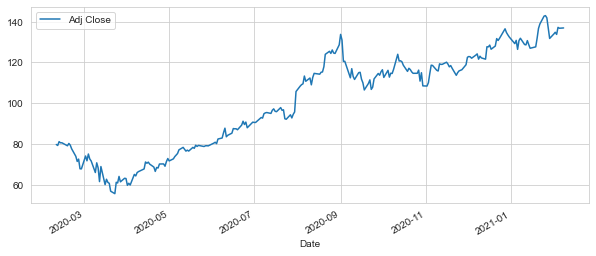

In [5]:
# Closing price
AAPL['Adj Close'].plot(legend=True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

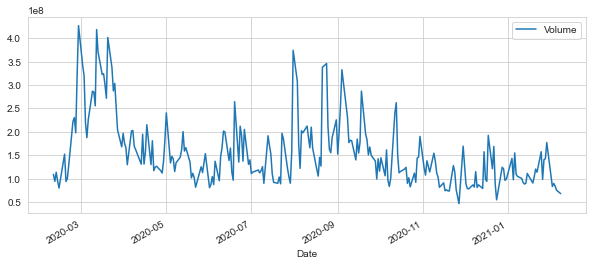

In [6]:
# Total volume of stock being traded each day
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [7]:
# Plot out several moving averages
ma_day = [10,20,50]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    AAPL[column_name] = AAPL['Adj Close'].rolling(ma).mean()

<AxesSubplot:xlabel='Date'>

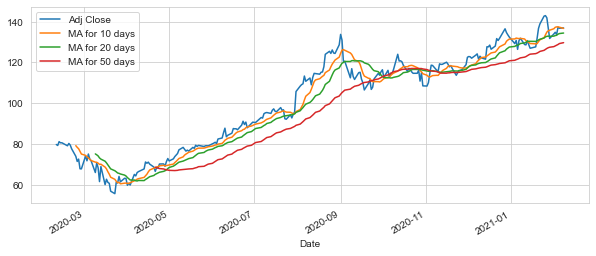

In [8]:
AAPL[['Adj Close','MA for 10 days','MA for 20 days','MA for 50 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

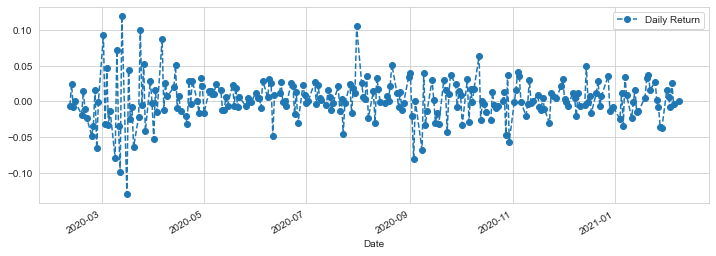

In [9]:
# Daily Return Analysis

AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4),legend=True,linestyle='--',marker='o')

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

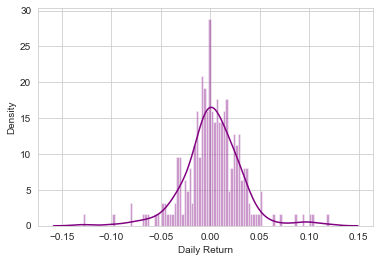

In [10]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [11]:
closing_df = data.DataReader(['AAPL','GOOG','MSFT','AMZN'],'yahoo',start,end)['Adj Close']

In [12]:
closing_df.head()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,79.769165,1508.680054,186.721939,2133.909912
2020-02-11,79.287888,1508.790039,182.506607,2150.800049
2020-02-12,81.170799,1518.270020,182.773773,2160.000000
2020-02-13,80.592773,1514.660034,181.784271,2149.870117
2020-02-14,80.612625,1520.739990,183.407059,2134.870117


In [13]:
closing_df.tail()

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2021-02-02,134.788589,1927.510010,239.509995,3380.000000
2021-02-03,133.740158,2070.070068,243.000000,3312.530029
2021-02-04,137.184998,2062.370117,242.009995,3331.000000
2021-02-05,136.759995,2098.000000,242.199997,3352.149902
2021-02-08,136.910004,2092.909912,242.470001,3322.939941


In [14]:
tech_rets = closing_df.pct_change()

In [15]:
tech_rets

Symbols,AAPL,GOOG,MSFT,AMZN
Date,,,,
2020-02-10,NaN,NaN,NaN,NaN
2020-02-11,-0.006033,0.000073,-0.022575,0.007915
2020-02-12,0.023748,0.006283,0.001464,0.004277
2020-02-13,-0.007121,-0.002378,-0.005414,-0.004690
2020-02-14,0.000246,0.004014,0.008927,-0.006977
...,...,...,...,...
2021-02-02,0.006337,0.013759,-0.000584,0.011104
2021-02-03,-0.007778,0.073961,0.014571,-0.019962
2021-02-04,0.025758,-0.003720,-0.004074,0.005576


/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


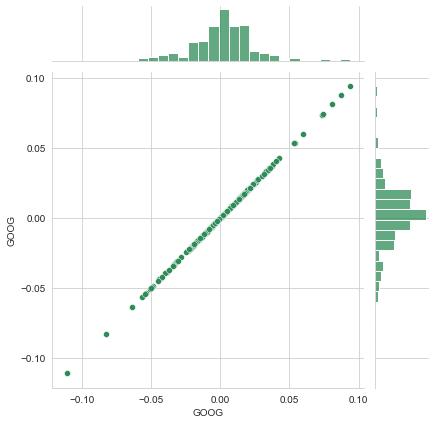

In [16]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot('GOOG','GOOG',tech_rets,kind='scatter',color='seagreen')

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


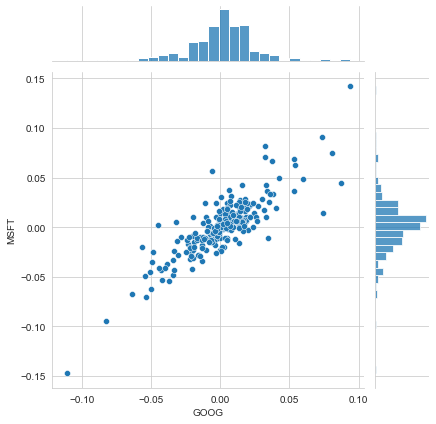

In [17]:
# Joinplot to compare the daily returns of Google and Microsoft
sns.jointplot('GOOG','MSFT',tech_rets,kind='scatter')

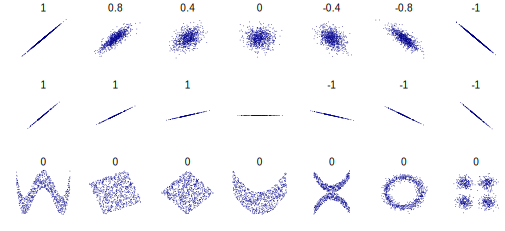

In [18]:
from IPython.display import SVG
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

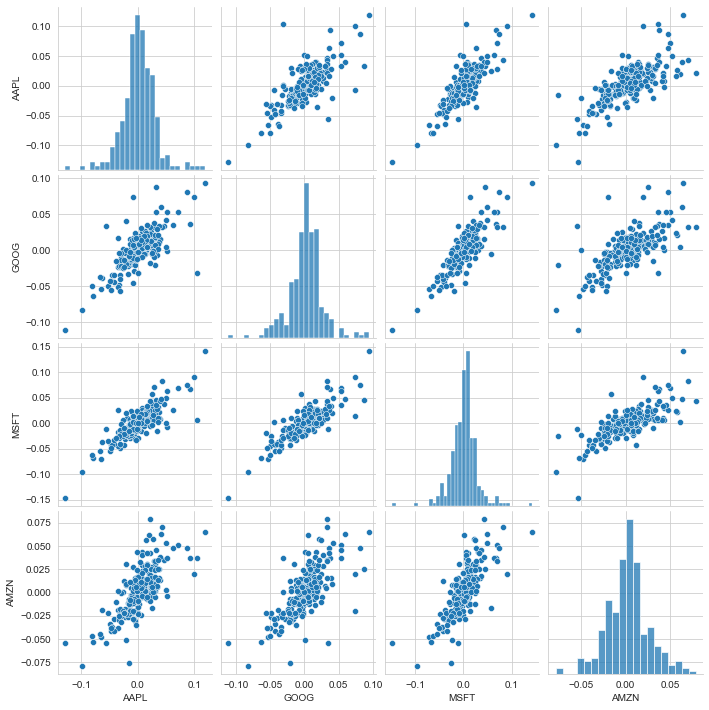

In [19]:
sns.pairplot(tech_rets.dropna())

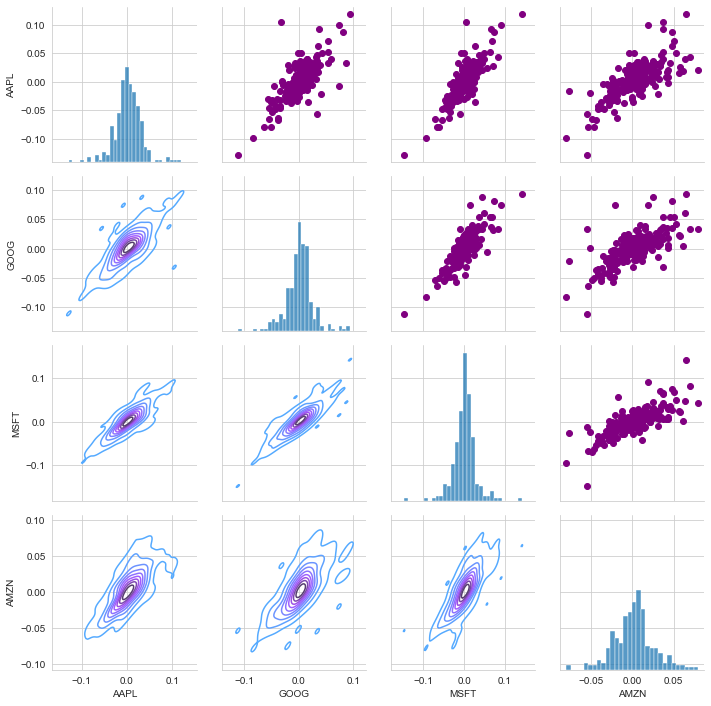

In [20]:
returns_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(sns.histplot,bins=30)

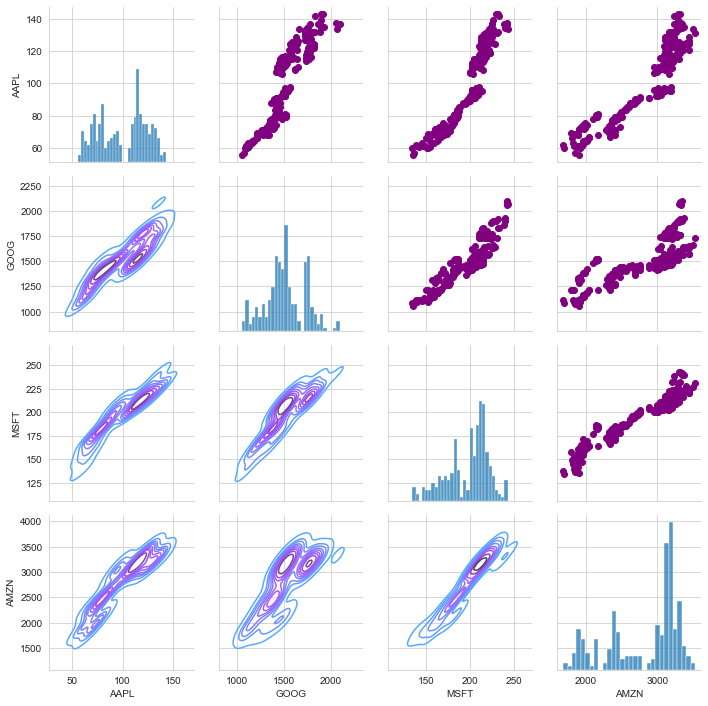

In [21]:
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the closing price
returns_fig.map_diag(sns.histplot,bins=30)

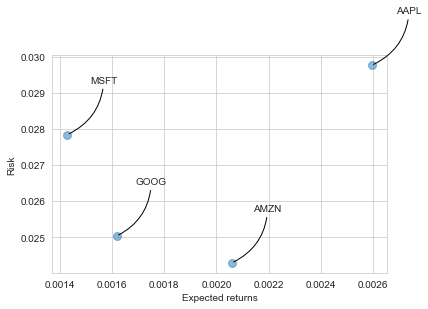

In [22]:
# Risk Analysis

rets = tech_rets.dropna()

area = np.pi*20

plt.scatter(rets.mean(), rets.std(),alpha = 0.5,s =area)

#Set the plot axis titles
plt.xlabel('Expected returns')
plt.ylabel('Risk')

# Label the scatter plots, for more info on how this is done
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3', color = 'black'))

/usr/local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

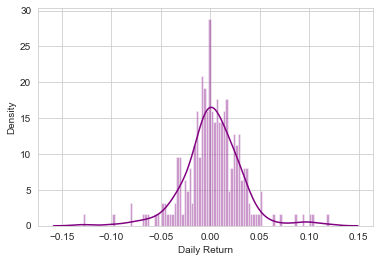

In [23]:
# Value at Risk => bootsrap method => calculating empirical quantile

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [24]:
rets['AAPL'].quantile(0.05)

-0.04373122175564248

In [25]:
# Value at Risk => MonteCarlo method
# ΔS=S(μΔt+σϵ√Δt)
# Set up our time horizon
days = 365

# Now our delta
dt = 1/days

mu = rets.mean()['GOOG']

sigma = rets.std()['GOOG']

In [26]:
def stock_monte_carlo(start_price,days,mu,sigma):
    ''' This function takes in starting stock price, days of simulation,mu,sigma, and returns simulated price array'''
    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Shock and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Shock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

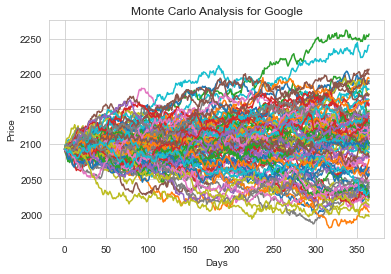

In [27]:
start_price = closing_df['GOOG'][-1]

for run in range(0,100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title("Monte Carlo Analysis for Google")

In [28]:
# Set a large number of runs
runs = 10000

# Create an empty matrix to hold the end price data
simulations = np.zeros(runs)

# Set the print options of numpy to only display 0-5 points from an array to suppress output
np.set_printoptions(threshold=5)

for run in range(0, runs):    
    # Set the simulation data point as the last stock price for that run
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1];

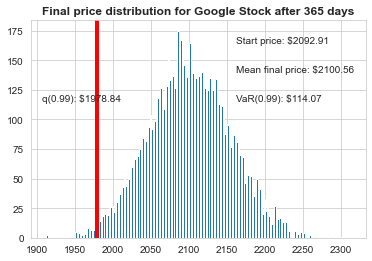

In [29]:
q = np.percentile(simulations, 1)
    
# Now let's plot the distribution of the end prices
plt.hist(simulations,bins=200)

# Using plt.figtext to fill in some additional information onto the plot

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');